In [85]:
import collections
import matplotlib.pyplot as plt
from collections import defaultdict
import collections
import numpy as np

In [3]:
"""Benchmark dataset reader."""

from littleballoffur.data_reader import GraphReader

reader = GraphReader("facebook")

graph = reader.get_graph()


Random Walk Sampler

In [4]:
#Random walk

import networkx as nx

from littleballoffur.exploration_sampling import RandomWalkSampler

sampler = RandomWalkSampler(10000)

rw_graph = sampler.sample(graph)

print('original graph nodes', len(graph.nodes))
print('after sampling graph nodes', len(rw_graph.nodes))

original graph nodes 22470
after sampling graph nodes 10000


Non Back Tracking Random Walk

In [5]:
"""Non back-tracking random walk sampler example"""

import networkx as nx
from littleballoffur.exploration_sampling import NonBackTrackingRandomWalkSampler


sampler = NonBackTrackingRandomWalkSampler(10000)

nrw_graph = sampler.sample(graph)

print('original graph nodes', len(graph.nodes))
print('after sampling graph nodes', len(nrw_graph.nodes))

original graph nodes 22470
after sampling graph nodes 10000


Forest Fire Sampler

In [6]:

"""Forest fire sampler example"""

import networkx as nx

from littleballoffur.exploration_sampling import ForestFireSampler

sampler = ForestFireSampler(10000)

ff_graph = sampler.sample(graph)

print('original graph nodes', len(graph.nodes))
print('after sampling graph nodes', len(ff_graph.nodes))

original graph nodes 22470
after sampling graph nodes 10000


Shortest Path Sampler

In [7]:
"""Shortest path sampler example"""

import networkx as nx

from littleballoffur.exploration_sampling import ShortestPathSampler


sampler = ShortestPathSampler(10000)

sp_graph = sampler.sample(graph)

print('original graph nodes', len(graph.nodes))
print('after sampling graph nodes', len(sp_graph.nodes))

original graph nodes 22470
after sampling graph nodes 10000


Snow Ball Sampler

In [8]:
"""Snow ball sampler example"""

import networkx as nx

from littleballoffur.exploration_sampling import SnowBallSampler


sampler = SnowBallSampler(10000)

snow_graph = sampler.sample(graph)

print('original graph nodes', len(graph.nodes))
print('after sampling graph nodes', len(snow_graph.nodes))

original graph nodes 22470
after sampling graph nodes 10000


Statistics

In [17]:
#Original graph
print('Average Clustering - Original: ',nx.average_clustering(graph))

print('-------------------------------------------------------------------')
#Random Walk
print('Average Clustering - Random Walk: ',nx.average_clustering(rw_graph))

#Non Back tracking Random Walk
print('Average Clustering - Non back Tracking Random Walk: ',nx.average_clustering(nrw_graph))

#Forest Fire
print('Average Clustering - Forest Fire: ',nx.average_clustering(ff_graph))

#Shortest Path
print('Average Clustering - Shortest Path: ',nx.average_clustering(sp_graph))

#Snow Ball
print('Average Clustering - Snow Ball: ',nx.average_clustering(snow_graph))



Average Clustering - Original:  0.3597383824426942
-------------------------------------------------------------------
Average Clustering - Random Walk:  0.4267055227143479
Average Clustering - Non back Tracking Random Walk:  0.4177505070142268
Average Clustering - Forest Fire:  0.39246228658476545
Average Clustering - Shortest Path:  0.3129128253290514
Average Clustering - Snow Ball:  0.3973117870487354


0.0023450945094509452

In [37]:
#Original graph
print('Triangles Percentage - Original: ',(sum(nx.triangles(graph).values()) / 3)/len(graph.nodes))

print('-------------------------------------------------------------------')
#Random Walk
print('Triangles Percentage- Random Walk: ',(sum(nx.triangles(rw_graph).values()) / 3)/len(rw_graph.nodes))

#Non Back tracking Random Walk
print('Triangles Percentage - Non back Tracking Random Walk: ',(sum(nx.triangles(nrw_graph).values()) / 3)/len(nrw_graph.nodes))

#Forest Fire
print('Triangles Percentage - Forest Fire: ',(sum(nx.triangles(ff_graph).values()) / 3)/len(ff_graph.nodes))

#Shortest Path
print('Triangles Percentage - Shortest Path: ',(sum(nx.triangles(sp_graph).values()) / 3)/len(sp_graph.nodes))

#Snow Ball
print('Triangles Percentage - Snow Ball: ',(sum(nx.triangles(snow_graph).values()) / 3)/len(snow_graph.nodes))



Triangles Percentage - Original:  35.37841566533155
-------------------------------------------------------------------
Triangles Percentage- Random Walk:  68.4626
Triangles Percentage - Non back Tracking Random Walk:  66.1708
Triangles Percentage - Forest Fire:  56.6966
Triangles Percentage - Shortest Path:  20.2804
Triangles Percentage - Snow Ball:  62.9623


In [31]:
#Original graph
print('Size of largest connected component - Original: ',len(max(nx.connected_components(graph))))

print('-------------------------------------------------------------------')
#Random Walk
print('Size of largest connected component- Random Walk: ',len(max(nx.connected_components(rw_graph))))

#Non Back tracking Random Walk
print('Size of largest connected component - Non back Tracking Random Walk: ',len(max(nx.connected_components(nrw_graph))))

#Forest Fire
print('Size of largest connected component - Forest Fire: ',len(max(nx.connected_components(ff_graph))))

#Shortest Path
print('Size of largest connected component - Shortest Path: ',len(max(nx.connected_components(sp_graph))))

#Snow Ball
print('Size of largest connected component - Snow Ball: ',len(max(nx.connected_components(snow_graph))))


Size of largest connected component - Original:  22470
-------------------------------------------------------------------
Size of largest connected component- Random Walk:  10000
Size of largest connected component - Non back Tracking Random Walk:  10000
Size of largest connected component - Forest Fire:  10000
Size of largest connected component - Shortest Path:  10000
Size of largest connected component - Snow Ball:  10000


In [40]:
print((nx.number_connected_components(graph)))

1


In [43]:
# nx.average_node_connectivity(graph)

In [45]:
#Original graph
print('Degree Assortativity Coefficient - Original: ',nx.degree_assortativity_coefficient(graph))

print('-------------------------------------------------------------------')

#Random Walk
print('Degree Assortativity Coefficient - Random Walk: ',nx.degree_assortativity_coefficient(rw_graph))

#Non Back tracking Random Walk
print('Degree Assortativity Coefficient - Non back Tracking Random Walk: ',nx.degree_assortativity_coefficient(nrw_graph))

#Forest Fire
print('Degree Assortativity Coefficient - Forest Fire: ',nx.degree_assortativity_coefficient(ff_graph))

#Shortest Path
print('Degree Assortativity Coefficient - Shortest Path: ',nx.degree_assortativity_coefficient(sp_graph))

#Snow Ball
print('Degree Assortativity Coefficient - Snow Ball: ',nx.degree_assortativity_coefficient(snow_graph))



Degree Assortativity Coefficient - Original:  0.08505802105736311
-------------------------------------------------------------------
Degree Assortativity Coefficient - Random Walk:  0.07821147053612659
Degree Assortativity Coefficient - Non back Tracking Random Walk:  0.08111119373116547
Degree Assortativity Coefficient - Forest Fire:  0.0790590755541251
Degree Assortativity Coefficient - Shortest Path:  0.11098957759987513
Degree Assortativity Coefficient - Snow Ball:  0.04753492676433928


In [48]:
# nx.diameter(graph)

In [51]:
graph.in_degree()

AttributeError: 'Graph' object has no attribute 'in_degree'

Matching Patterns

In [27]:
def degree_distributon(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    return deg,cnt



In [28]:
#Original 
deg,cnt = degree_distributon(graph)

#Random Walk
deg1,cnt1 = degree_distributon(rw_graph)

#Non Back tracking Random Walk
deg2,cnt2 = degree_distributon(nrw_graph)

#Forest Fire
deg3,cnt3 = degree_distributon(ff_graph)

#Shortest Path
deg4,cnt4 = degree_distributon(sp_graph)

#Snow Ball
deg5,cnt5 = degree_distributon(snow_graph)

Text(0.5, 0, 'Degree')

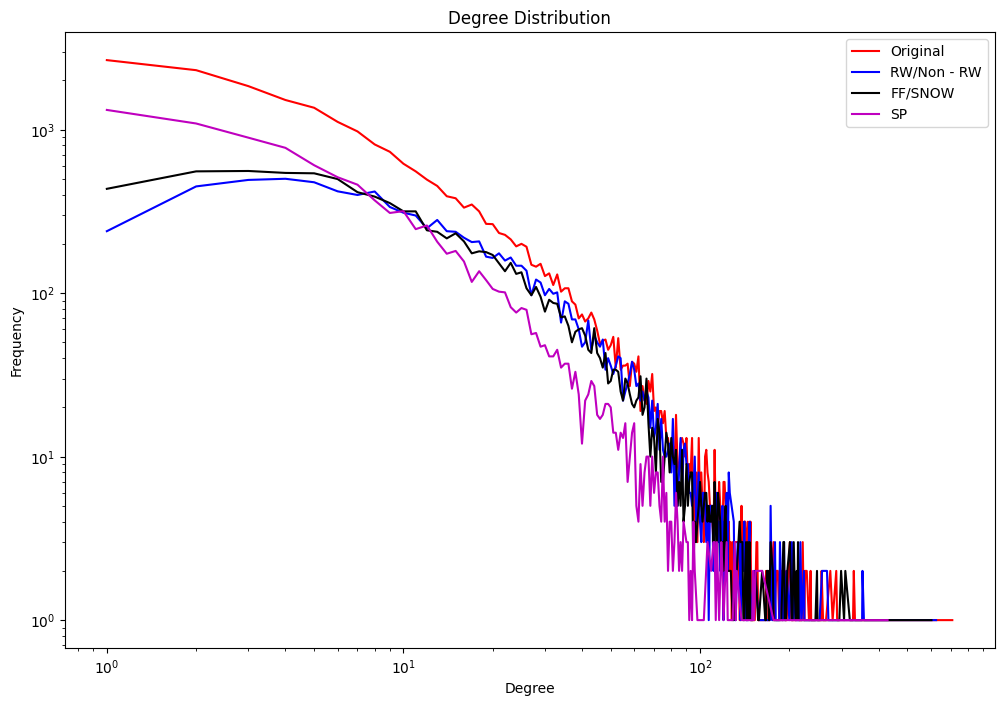

In [29]:
plt.figure(figsize=(12, 8))
plt.loglog(deg, cnt, 'r-', label='original')
plt.loglog(deg1,cnt1, 'b-', label='RW')
# plt.loglog(deg2,cnt2,'g-', label='Non - RW')
plt.loglog(deg3, cnt3, 'k-', label='FF')
plt.loglog(deg4, cnt4, 'm-', label='SP')
# plt.loglog(deg5, cnt5, 'y-', label='SNOW')
plt.legend(['Original','RW/Non - RW','FF/SNOW','SP'])
plt.title("Degree Distribution")
plt.ylabel("Frequency")
plt.yscale('log')
# plt.xscale('log')
plt.xlabel("Degree")

In [98]:

# def degree_clustering(G):

#    degree_list,clustering_list = [], []

#    d = defaultdict(list)
#    for u in graph.nodes():
#       d[graph.degree(u)].append(u)

#    # d = collections.OrderedDict(sorted(d.items()))
#    # print(d)
#    for degree in sorted(d):
#       clustering_coeff = nx.average_clustering(graph, d[degree])
#       degree_list.append(degree)
#       clustering_list.append(clustering_coeff)
#       # sum(clustering_coeff.values())/len(clustering_coeff)

#       return degree_list,clustering_list
def degree_clustering(G):
   degree = graph.degree()
   degree_list,degrees,clustering_list = [],[],[]
   for n,m in degree:
      degree_list.append(m)
   degree_list
   degree_np = np.asarray(sorted(degree_list))

   for k in range(len(np.unique(degree_np))):
      nodes_degree_k = [u for u in graph.nodes() if graph.degree(u) == k]
      if len(nodes_degree_k) != 0:
         clustering_coeff = nx.average_clustering(graph, nodes_degree_k)
         degrees.append(k)
         clustering_list.append(clustering_coeff)
         
   return degrees,clustering_list
      

In [100]:
degrees,clustering_list = degree_clustering(graph)
degrees1,clustering_list1 = degree_clustering(rw_graph)

Text(0.5, 0, 'Degree')

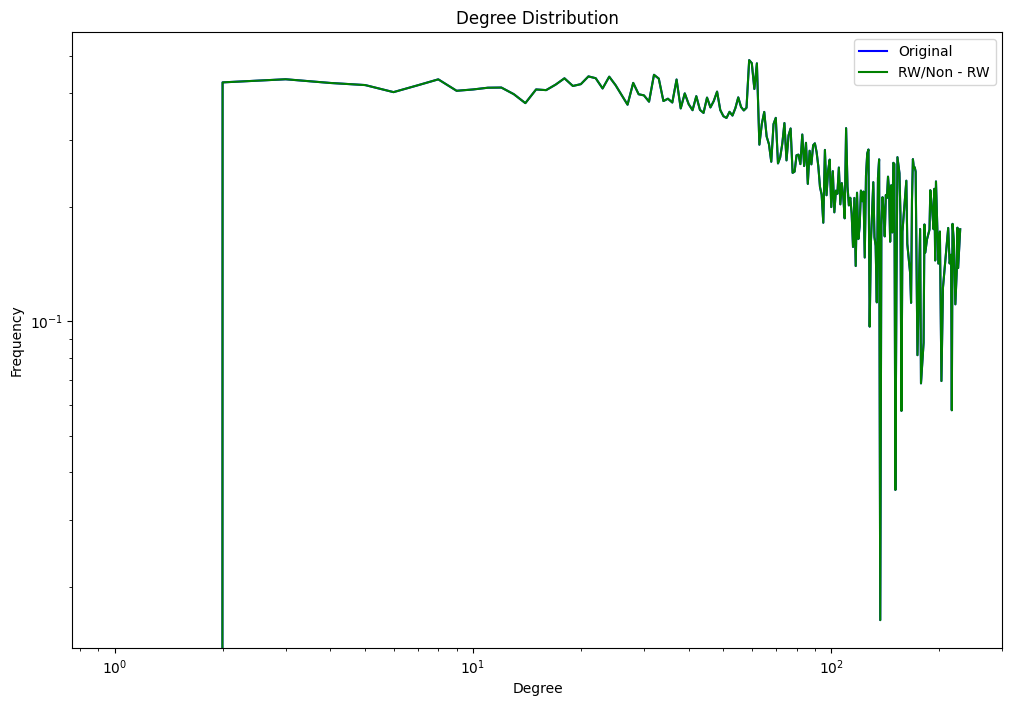

In [108]:
plt.figure(figsize=(12, 8))
# plt.scatter(degrees, clustering_list, color='red')
# plt.scatter(degrees1, clustering_list1, color='blue')
plt.loglog(degrees,clustering_list, 'b-', label='RW')
plt.loglog(degrees1,clustering_list1,'g-', label='Non - RW')
# plt.loglog(deg3, cnt3, 'k-', label='FF')
# plt.loglog(deg4, cnt4, 'm-', label='SP')
# plt.loglog(deg5, cnt5, 'y-', label='SNOW')
plt.legend(['Original','RW/Non - RW','FF/SNOW','SP'])
plt.title("Degree Distribution")
plt.ylabel("Frequency")
# plt.xscale('log')
plt.yscale('log')
plt.xlabel("Degree")

